In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

### **1. Activation Functions**

In [2]:
# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid Derivative
def sigmoid_derivative(x):
    return x * (1 - x)

### **1. Sigmoid Function Explanation**
The sigmoid function is a mathematical function that maps any real number to a value between 0 and 1. It is commonly used in neural networks for binary classification.

#### **Mathematical Formula:**
$
\sigma(x) = \frac{1}{1 + e^{-x}}
$

#### **Characteristics:**
- **Range:** (0, 1)
- **Shape:** S-shaped (logistic curve)
- **Use Case:** It is used when outputs need to be probabilities.

---

### **2. Sigmoid Derivative Explanation**
The derivative of the sigmoid function is used during **backpropagation** to calculate gradients.

#### **Mathematical Formula:**
$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$

This formula simplifies the gradient computation since the derivative can be computed using only the output of the sigmoid function itself.

---

In [3]:
# Generate values
x_sig = np.linspace(-10, 10, 100)
y_sig = sigmoid(x_sig)
y_derivative = sigmoid_derivative(y_sig)

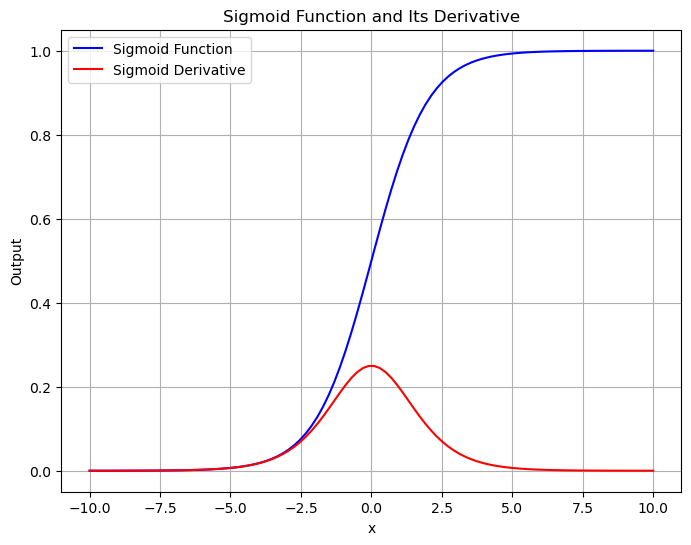

In [4]:
# Visualization
plt.figure(figsize=(8, 6))
plt.plot(x_sig, y_sig, label='Sigmoid Function', color='b')
plt.plot(x_sig, y_derivative, label='Sigmoid Derivative', color='r')
plt.title("Sigmoid Function and Its Derivative")
plt.xlabel("x")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()

### **What You See:**
- **Blue Line (Sigmoid Function):** Shows the S-curve mapping values to a range between 0 and 1.
- **Red Line (Derivative):** Shows the gradient, highest at the center (around x=0), where learning is most efficient. At the edges, the gradient approaches zero, meaning learning slows down.

---

In [5]:
# ReLU
def relu(x):
    return np.maximum(0, x)

# ReLU Derivative
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

### **1. ReLU Function Explanation**
The **Rectified Linear Unit (ReLU)** is one of the most commonly used activation functions in modern neural networks.

#### **Mathematical Formula:**
$
f(x) = \max(0, x)
$

#### **Characteristics:**
- **Range:** [0, ∞)
- **Shape:** Linear for positive values, zero for negative values.
- **Use Case:** Commonly used in hidden layers of deep learning models due to its simplicity and efficiency.

---

### **2. ReLU Derivative Explanation**
The derivative of the ReLU function is used during **backpropagation** to adjust the network's weights.

#### **Mathematical Formula:**
$
f'(x) = 
\begin{cases} 
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}
$

This means:
- **For positive values:** The gradient is 1.
- **For zero or negative values:** The gradient is 0 (no learning occurs).

---

In [6]:
x_relu = np.linspace(-10, 10, 100)
y_relu = relu(x_relu)
y_derivative = relu_derivative(x_relu)

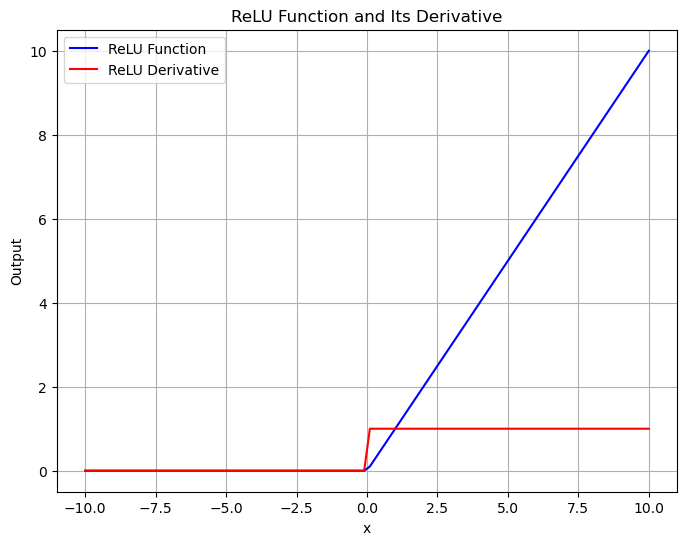

In [7]:
# Visualization
plt.figure(figsize=(8, 6))
plt.plot(x_relu, y_relu, label='ReLU Function', color='b')
plt.plot(x_relu, y_derivative, label='ReLU Derivative', color='r')
plt.title("ReLU Function and Its Derivative")
plt.xlabel("x")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()

### **What You See:**
- **Blue Line (ReLU Function):** Zero for negative values, linearly increasing for positive values.
- **Red Line (ReLU Derivative):** Zero for negative values and one for positive values, showing where learning occurs.

---

In [8]:
# Tanh
def tanh(x):
    return np.tanh(x)

# Tanh Derivative
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

### **1. Tanh Function Explanation**
The **Hyperbolic Tangent (tanh)** is an activation function that outputs values between -1 and 1, making it useful for centered data.

#### **Mathematical Formula:**
$
f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$

#### **Characteristics:**
- **Range:** (-1, 1)
- **Shape:** S-shaped (similar to sigmoid but centered around 0).
- **Use Case:** Used when data needs to be normalized around zero, helping the network learn more efficiently by centering outputs.

---

### **2. Tanh Derivative Explanation**
The derivative of the tanh function is used during **backpropagation** to compute gradients.

#### **Mathematical Formula:**
$
f'(x) = 1 - \tanh^2(x)
$

This value approaches zero as the input moves away from the origin, leading to slower learning for large positive or negative values.

---

In [9]:
x_tanh = np.linspace(-5, 5, 100)
y_tanh = tanh(x_tanh)
y_derivative = tanh_derivative(x_tanh)

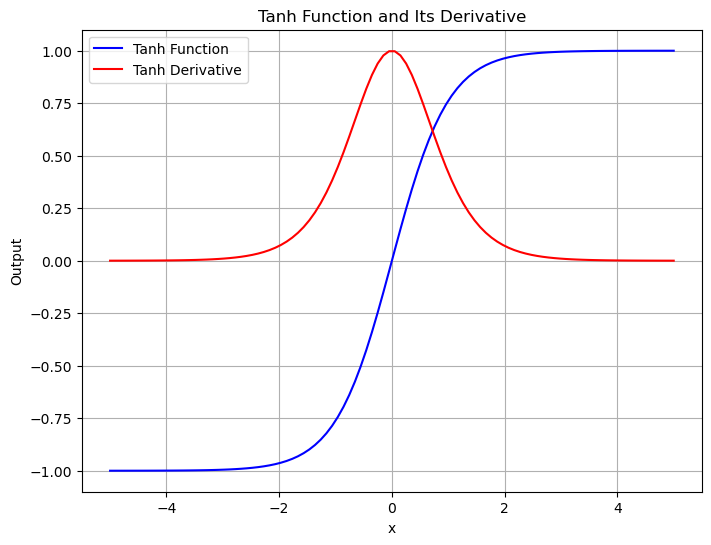

In [10]:
# Visualization
plt.figure(figsize=(8, 6))
plt.plot(x_tanh, y_tanh, label='Tanh Function', color='b')
plt.plot(x_tanh, y_derivative, label='Tanh Derivative', color='r')
plt.title("Tanh Function and Its Derivative")
plt.xlabel("x")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()

### **What You See:**
- **Blue Line (Tanh Function):** S-curve ranging from -1 to 1.
- **Red Line (Tanh Derivative):** Highest at the center (around x=0), indicating where learning occurs best. It approaches zero as x moves away from zero, slowing down learning.

---

In [11]:
# Softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

---

### **1. Softmax Function Explanation**
The **Softmax** function converts a vector of raw scores (logits) into probabilities that sum to 1. It is often used in the final layer of neural networks for **multi-class classification**.

---

#### **Mathematical Formula:**
For a vector $( x = [x_1, x_2, ..., x_n] )$:
$
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
$

---

### **Why Subtract `np.max(x)`?**
In the implementation:
```python
exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
```

- **Numerical Stability:** Subtracting the maximum value from `x` avoids large exponentials, reducing the risk of numerical overflow.

---

In [12]:
# Sample logits (random scores)
logits = np.array([[2.0, 1.0, 0.1]])

In [13]:
# Apply Softmax
probabilities = softmax(logits)

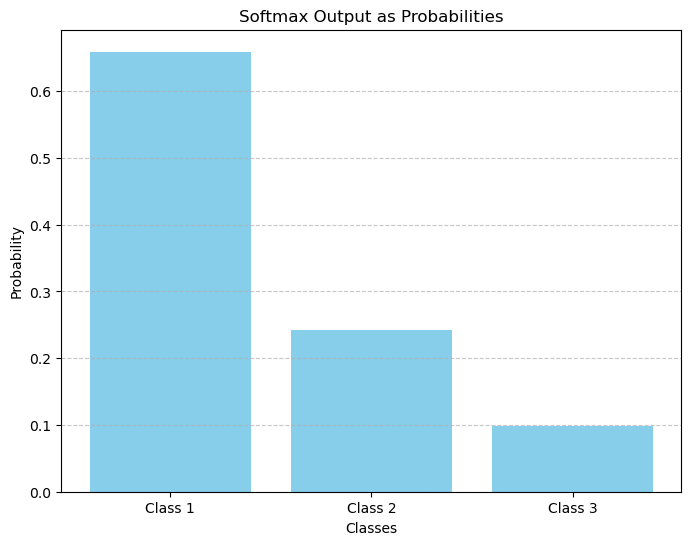

In [14]:
# Visualization
labels = ['Class 1', 'Class 2', 'Class 3']
plt.figure(figsize=(8, 6))
plt.bar(labels, probabilities[0], color='skyblue')
plt.title("Softmax Output as Probabilities")
plt.ylabel("Probability")
plt.xlabel("Classes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
# Print Results
print(f"Logits: {logits}")
print(f"Softmax Probabilities: {probabilities}")

Logits: [[2.  1.  0.1]]
Softmax Probabilities: [[0.65900114 0.24243297 0.09856589]]


### **What You See:**
- The bar chart shows the probabilities generated by the **Softmax** function.
- The sum of all probabilities will be 1, ensuring valid class probabilities.

---

### **2. Initialize Weights and Biases**

In [16]:
def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.1
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

### **1. Why Initialize Weights?**
- **Weights (W1, W2):** Control how inputs are transformed at each layer.
- **Biases (b1, b2):** Allow the network to shift activation functions.
- **Why Random Initialization?** Random values break symmetry, ensuring each neuron learns differently.

---

### **3. Why Use `np.random.randn`?**
- `np.random.randn` generates values from a standard normal distribution (mean=0, std=1).
- Multiplying by `0.1` scales values down, keeping the initial weights small. Large weights can cause unstable activations.

---

In [17]:
# Initialize
input_size = 3
hidden_size = 4
output_size = 2

In [18]:
W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)

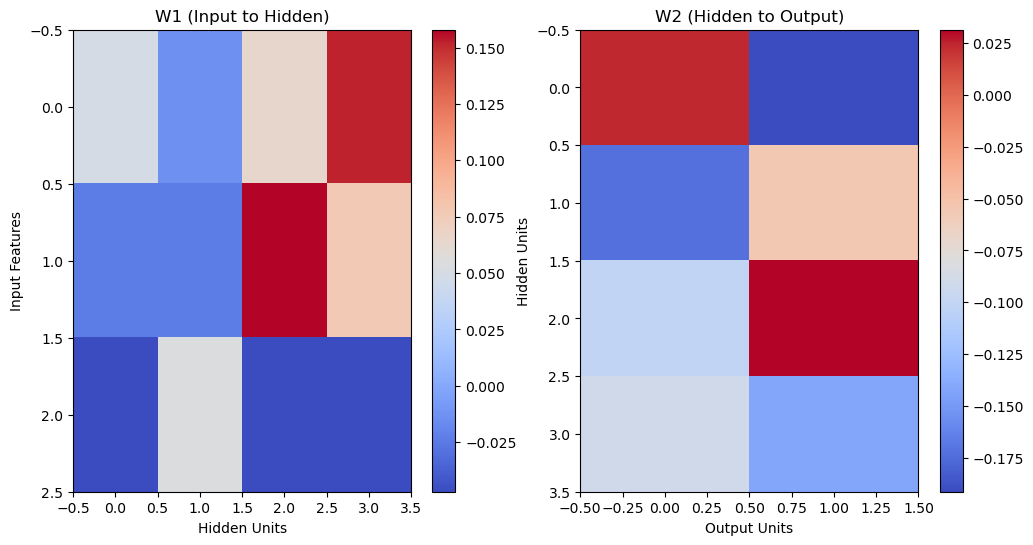

In [19]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot W1
im1 = ax[0].imshow(W1, cmap='coolwarm', aspect='auto')
ax[0].set_title("W1 (Input to Hidden)")
ax[0].set_xlabel("Hidden Units")
ax[0].set_ylabel("Input Features")
fig.colorbar(im1, ax=ax[0])

# Plot W2
im2 = ax[1].imshow(W2, cmap='coolwarm', aspect='auto')
ax[1].set_title("W2 (Hidden to Output)")
ax[1].set_xlabel("Output Units")
ax[1].set_ylabel("Hidden Units")
fig.colorbar(im2, ax=ax[1])

plt.show()

### **What You See:**
- **W1 (Input to Hidden Layer):** Randomly initialized weights connecting inputs to hidden neurons.
- **W2 (Hidden to Output Layer):** Random weights connecting hidden neurons to output neurons.


---

### **3. Forward Propagation**

In [20]:
def forward_propagation(X, W1, b1, W2, b2):
    # Hidden Layer
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    # Output Layer
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

### **1. Detailed Steps:**
1. **Hidden Layer Computation:**
   - **Weighted Sum (Z1):**
     $
     Z_1 = X \cdot W_1 + b_1
     $
     - `X`: Input features.
     - `W1`: Weights from input to hidden layer.
     - `b1`: Bias for hidden layer.

   - **Activation (A1):**
     $
     A_1 = \text{ReLU}(Z_1)
     $
     - ReLU ensures non-negative values.

2. **Output Layer Computation:**
   - **Weighted Sum (Z2):**
     $
     Z_2 = A_1 \cdot W_2 + b_2
     $
     - `W2`: Weights from hidden to output layer.
     - `b2`: Bias for the output layer.

   - **Activation (A2):**
     $
     A_2 = \text{Softmax}(Z_2)
     $
     - Softmax converts raw scores into probabilities.

---

In [21]:
# Example Data
X_fw = np.array([[0.5, 0.2, 0.8]])

In [22]:
# Initialize Weights
input_size = 3
hidden_size = 4
output_size = 2
W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)

In [23]:
# Forward Pass
Z1, A1, Z2, A2 = forward_propagation(X_fw, W1, b1, W2, b2)

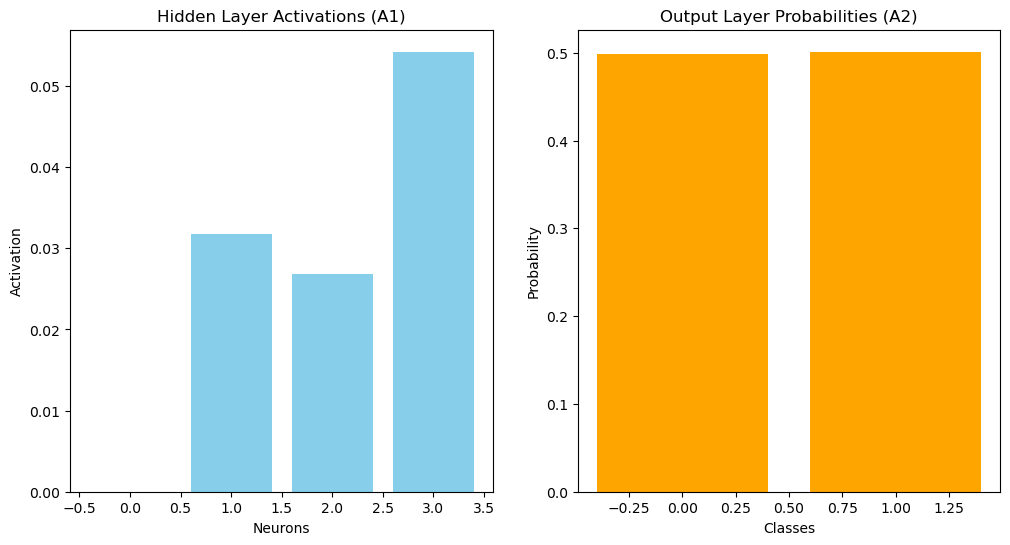

In [24]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Hidden Layer Activations
ax[0].bar(range(hidden_size), A1[0], color='skyblue')
ax[0].set_title("Hidden Layer Activations (A1)")
ax[0].set_xlabel("Neurons")
ax[0].set_ylabel("Activation")

# Output Layer Probabilities
ax[1].bar(range(output_size), A2[0], color='orange')
ax[1].set_title("Output Layer Probabilities (A2)")
ax[1].set_xlabel("Classes")
ax[1].set_ylabel("Probability")

plt.show()

In [25]:
# Print Results
print("Z1 (Hidden Layer Inputs):", Z1)
print("A1 (Hidden Layer Activations):", A1)
print("Z2 (Output Layer Inputs):", Z2)
print("A2 (Output Probabilities):", A2)

Z1 (Hidden Layer Inputs): [[-0.01740531  0.03180885  0.02689527  0.05424181]]
A1 (Hidden Layer Activations): [[0.         0.03180885 0.02689527 0.05424181]]
Z2 (Output Layer Inputs): [[-0.01313609 -0.00860399]]
A2 (Output Probabilities): [[0.49886698 0.50113302]]


### **What You See:**
- **Bar Chart (Hidden Layer Activations):** Activations of hidden layer neurons.
- **Bar Chart (Output Layer Probabilities):** Probabilities generated by Softmax.

---

### **4. Backpropagation**

In [26]:
def backpropagation(X, y, Z1, A1, Z2, A2, W1, W2):
    # Output Layer Error
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    # Hidden Layer Error
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    
    return dW1, db1, dW2, db2

### **Explanation of Each Step:**

#### **1. Output Layer Error:**
- **Error Signal (`dZ2`):**
$
dZ_2 = A_2 - y
$
This computes the difference between the predicted output `A2` and the true labels `y`.

- **Gradients for Weights and Biases:**
$
dW_2 = A_1^T \cdot dZ_2
$
$
db_2 = \sum dZ_2
$

---

#### **2. Hidden Layer Error:**
- **Backpropagate the Error:**
$
dA_1 = dZ_2 \cdot W_2^T
$

- **Apply ReLU Derivative:**
$
dZ_1 = dA_1 \times \text{ReLU}'(Z_1)
$

- **Compute Weight and Bias Gradients:**
$
dW_1 = X^T \cdot dZ_1
$
$
db_1 = \sum dZ_1
$

---

### **3. Why Use `relu_derivative(Z1)`?**
The ReLU derivative returns `1` where `Z1 > 0` and `0` where `Z1 <= 0`. This ensures that only active neurons update weights during backpropagation.

---

In [27]:
# Example Data
X = np.array([[0.5, 0.2, 0.8]])
y = np.array([[1, 0]])  # True label (one-hot)

In [28]:
# Initialize Weights
input_size = 3
hidden_size = 4
output_size = 2
W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)

In [29]:
# Forward Pass
Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)

In [30]:
# Backward Pass
dW1, db1, dW2, db2 = backpropagation(X, y, Z1, A1, Z2, A2, W1, W2)

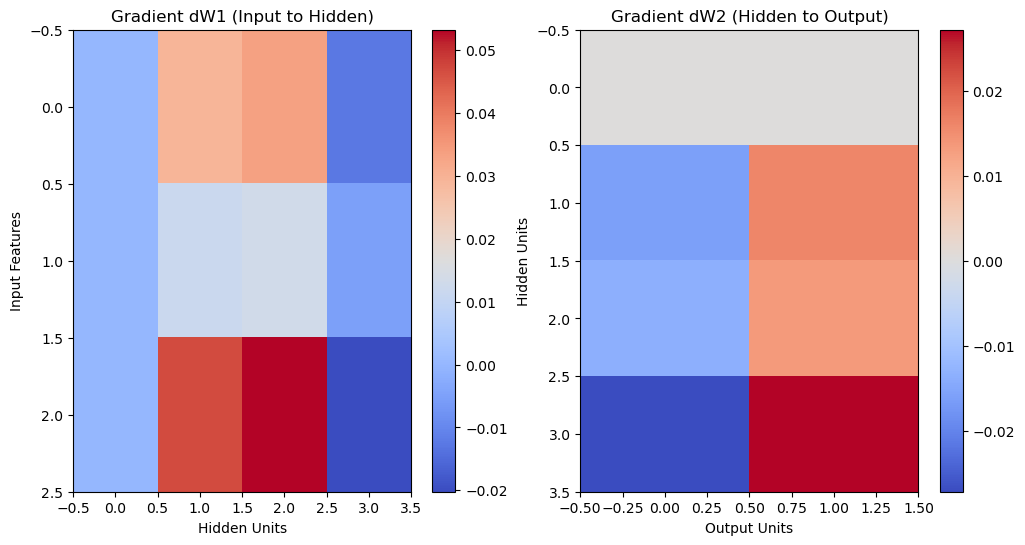

In [31]:
# Visualization of Gradients
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Visualize dW1 (Input to Hidden)
im1 = ax[0].imshow(dW1, cmap='coolwarm', aspect='auto')
ax[0].set_title("Gradient dW1 (Input to Hidden)")
ax[0].set_xlabel("Hidden Units")
ax[0].set_ylabel("Input Features")
fig.colorbar(im1, ax=ax[0])

# Visualize dW2 (Hidden to Output)
im2 = ax[1].imshow(dW2, cmap='coolwarm', aspect='auto')
ax[1].set_title("Gradient dW2 (Hidden to Output)")
ax[1].set_xlabel("Output Units")
ax[1].set_ylabel("Hidden Units")
fig.colorbar(im2, ax=ax[1])

plt.show()

In [32]:
# Print Gradient Results
print("dW1 (Input to Hidden):", dW1)
print('--'*40)
print("db1 (Bias Hidden):", db1)
print('--'*40)
print("dW2 (Hidden to Output):", dW2)
print('--'*40)
print("db2 (Bias Output):", db2)

dW1 (Input to Hidden): [[-0.          0.02913162  0.03325214 -0.01263556]
 [-0.          0.01165265  0.01330086 -0.00505422]
 [-0.          0.0466106   0.05320343 -0.02021689]]
--------------------------------------------------------------------------------
db1 (Bias Hidden): [[ 0.          0.05826324  0.06650428 -0.02527112]]
--------------------------------------------------------------------------------
dW2 (Hidden to Output): [[-0.          0.        ]
 [-0.01594046  0.01594046]
 [-0.01347811  0.01347811]
 [-0.02718236  0.02718236]]
--------------------------------------------------------------------------------
db2 (Bias Output): [[-0.50113302  0.50113302]]


### **What You See:**
- **Gradient dW1 Visualization:** Shows how input-to-hidden weights are adjusted.
- **Gradient dW2 Visualization:** Shows how hidden-to-output weights are updated.

---

### **5. Update Parameters**

In [33]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

### **Explanation of Each Step:**
1. **Weights Update:**
   - **W1 Update (Input to Hidden):**
     $
     W_1 = W_1 - \text{learning\_rate} \times dW_1
     $
   - **W2 Update (Hidden to Output):**
     $
     W_2 = W_2 - \text{learning\_rate} \times dW_2
     $

2. **Bias Update:**
   - **b1 Update (Hidden Layer Bias):**
     $
     b_1 = b_1 - \text{learning\_rate} \times db_1
     $
   - **b2 Update (Output Layer Bias):**
     $
     b_2 = b_2 - \text{learning\_rate} \times db_2
     $

---

### **Why Use Gradient Descent?**
- **Goal:** Minimize the loss function by adjusting the weights and biases.
- **Learning Rate:** Controls the size of the steps during updates. A small learning rate leads to slow learning, while a large one may cause overshooting.

---

In [34]:
# Initialize Example Data
X = np.array([[0.5, 0.2, 0.8]])
y = np.array([[1, 0]])

In [35]:
# Initialize Weights
input_size = 3
hidden_size = 4
output_size = 2
learning_rate = 0.1

In [36]:
W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)

# Forward Pass
Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)

In [37]:
# Backward Pass
dW1, db1, dW2, db2 = backpropagation(X, y, Z1, A1, Z2, A2, W1, W2)

In [38]:
# Print Before Update
print("=== Before Update ===")
print("W1:\n", W1)
print("b1:\n", b1)
print("W2:\n", W2)
print("b2:\n", b2)

=== Before Update ===
W1:
 [[ 0.04967142 -0.01382643  0.06476885  0.15230299]
 [-0.02341534 -0.0234137   0.15792128  0.07674347]
 [-0.04694744  0.054256   -0.04634177 -0.04657298]]
b1:
 [[0. 0. 0. 0.]]
W2:
 [[ 0.02419623 -0.19132802]
 [-0.17249178 -0.05622875]
 [-0.10128311  0.03142473]
 [-0.09080241 -0.14123037]]
b2:
 [[0. 0.]]


In [39]:
# Update Parameters
W1_updated, b1_updated, W2_updated, b2_updated = update_parameters(
    W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate
)

In [40]:
# Print After Update
print("\n=== After Update ===")
print("W1 Updated:\n", W1_updated)
print("b1 Updated:\n", b1_updated)
print("W2 Updated:\n", W2_updated)
print("b2 Updated:\n", b2_updated)


=== After Update ===
W1 Updated:
 [[ 0.04967142 -0.01673959  0.06144364  0.15356654]
 [-0.02341534 -0.02457896  0.1565912   0.0772489 ]
 [-0.04694744  0.04959494 -0.05166211 -0.04455129]]
b1 Updated:
 [[ 0.         -0.00582632 -0.00665043  0.00252711]]
W2 Updated:
 [[ 0.02419623 -0.19132802]
 [-0.17089774 -0.0578228 ]
 [-0.0999353   0.03007692]
 [-0.08808417 -0.14394861]]
b2 Updated:
 [[ 0.0501133 -0.0501133]]


---

### **6. Training Loop**

In [41]:
def train(X, y, hidden_size, epochs, learning_rate):
    input_size = X.shape[1]
    output_size = y.shape[1]
    W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)
    losses = []

    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        loss = -np.mean(y * np.log(A2 + 1e-8))  # Cross-Entropy Loss
        losses.append(loss)

        dW1, db1, dW2, db2 = backpropagation(X, y, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return W1, b1, W2, b2, losses

### **Key Steps Explained:**

#### **1. Initialization:**
- Initializes weights `W1`, `W2` and biases `b1`, `b2` using `initialize_weights()`.
- Prepares a list `losses` to store the loss for every epoch.

---

#### **2. Training Loop:**
- **Forward Propagation:** Computes outputs `A2` through the layers using `forward_propagation()`.
- **Loss Calculation:** Uses **Cross-Entropy Loss**:
  $
  \text{Loss} = -\frac{1}{N} \sum(y \cdot \log(A2))
  $
  This measures how well predictions match the labels.

- **Backward Propagation:** Computes gradients with `backpropagation()`.
- **Parameter Updates:** Adjusts weights and biases with `update_parameters()`.

---

#### **3. Output:**
- Prints the loss every 1000 epochs.
- Returns the final weights, biases, and the loss history.

---

---

### **7. Training the Model**

In [42]:
# Input data (XOR pattern)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Target output (one-hot encoded)
y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

In [43]:
W1, b1, W2, b2, losses = train(X, y, hidden_size=4, epochs=10000, learning_rate=0.1)

Epoch 0, Loss: 0.3464
Epoch 1000, Loss: 0.0014
Epoch 2000, Loss: 0.0006
Epoch 3000, Loss: 0.0004
Epoch 4000, Loss: 0.0003
Epoch 5000, Loss: 0.0002
Epoch 6000, Loss: 0.0002
Epoch 7000, Loss: 0.0001
Epoch 8000, Loss: 0.0001
Epoch 9000, Loss: 0.0001


---

### **9. Visualization**

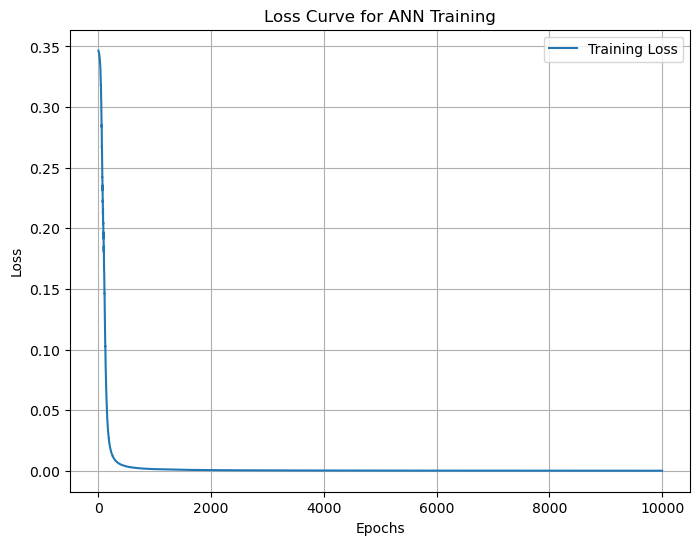

In [44]:
# Plot the Loss over Epochs
plt.figure(figsize=(8, 6))
plt.plot(losses, label='Training Loss')
plt.title("Loss Curve for ANN Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

---